# Multi-Layer Perceptron

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPClassifier

In [2]:
def show_confusion_matrix_heatmap(cm, labels):
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    fig = sn.heatmap(cm_df, annot=True, cmap='viridis')
    plt.xlabel('PREDICTED')
    plt.xticks(rotation=45)
    plt.ylabel('TRUE')
    plt.yticks(rotation=45)
    plt.show()
    
def show_report(y, y_pred, labels):
    cr = classification_report(y, y_pred, target_names=labels)
    print(cr)
    cm = confusion_matrix(y, y_pred)
    show_confusion_matrix_heatmap(cm, labels)

In [3]:
clf = MLPClassifier(max_iter=1000)

The default parameters for MLP used by sklearn can be seen [here](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

## Iris dataset

                 precision    recall  f1-score   support

Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       0.98      0.94      0.96        50
    Iris-setosa       0.94      0.98      0.96        50

    avg / total       0.97      0.97      0.97       150



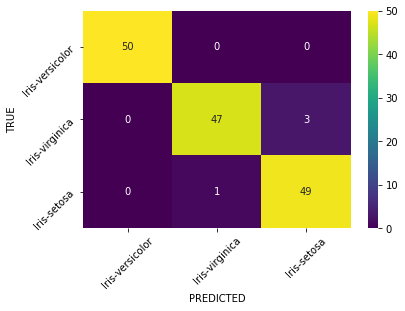

In [4]:
df = pd.read_csv('data/iris.data', header=None)
X = df.values[:,:-1]
y = df.values[:,-1]
labels = list(set(y))
y_pred = cross_val_predict(clf, X, y, cv=10)
show_report(y, y_pred, labels)